In [121]:
import pandas as pd
import numpy as np
import re
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint

# Gensim
import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felicia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load dataset

In [122]:
df_full = pd.read_csv('hippoCorpusV2.csv')
df = pd.read_csv('hippoCorpusV2.csv')
story = df["story"]

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Clean data

In [123]:
# tokenization 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(story))

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
# remove stopwords
stop_words = nltk.corpus.stopwords.words('english')
stop_words = list(stop_words)
#stop_words.extend(["time", "day"])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words = remove_stopwords(data_words)

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words 
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Topic Modelling

In [126]:
# create LDA model
Model = gensim.models.LdaModel(corpus, id2word=id2word, num_topics=3)

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
# print topics
topics = Model.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.011*"time" + 0.009*"got" + 0.008*"went" + 0.007*"day" + 0.006*"one" + 0.006*"back" + 0.006*"would" + 0.006*"go" + 0.006*"get" + 0.005*"family" + 0.005*"us" + 0.005*"see" + 0.005*"could" + 0.004*"really" + 0.004*"took" + 0.004*"much" + 0.004*"around" + 0.004*"home" + 0.004*"also" + 0.004*"like"')
(1, '0.011*"time" + 0.009*"like" + 0.009*"would" + 0.008*"really" + 0.007*"get" + 0.006*"one" + 0.005*"day" + 0.005*"know" + 0.005*"went" + 0.005*"work" + 0.005*"us" + 0.005*"could" + 0.005*"even" + 0.005*"felt" + 0.005*"life" + 0.005*"things" + 0.004*"going" + 0.004*"got" + 0.004*"much" + 0.004*"go"')
(2, '0.012*"day" + 0.008*"time" + 0.008*"would" + 0.008*"one" + 0.008*"life" + 0.006*"got" + 0.006*"get" + 0.006*"new" + 0.005*"going" + 0.005*"friends" + 0.005*"months" + 0.005*"ago" + 0.004*"made" + 0.004*"family" + 0.004*"like" + 0.004*"back" + 0.004*"could" + 0.004*"never" + 0.004*"went" + 0.004*"school"')
/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipker

In [128]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(Model, corpus, id2word)
vis

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.028941  0.022157       1        1  43.631702
0      0.049502  0.002650       2        1  32.057428
2     -0.020560 -0.024808       3        1  24.310870, topic_info=        Term         Freq        Total Category  logprob  loglift
17       day  5905.000000  5905.000000  Default  30.0000  30.0000
85      life  3678.000000  3678.000000  Default  29.0000  29.0000
221      new  2395.000000  2395.000000  Default  28.0000  28.0000
170   school  1393.000000  1393.000000  Default  27.0000  27.0000
27   friends  2197.000000  2197.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
194     work   681.367800  2800.055200   Topic3  -5.6560   0.0010
62      went   781.658562  4524.095281   Topic3  -5.5187  -0.3415
33      like   804.216276  5013.258612   Topic3  -5.4902  -0.4157
50       see   695.945165  3195.964974   Topic3  -5.6348  -0.1101
140    first   686.361841  3034.551843   Topic3  -5.6487  -0.0722

[336 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
23265      1  0.055774       abby
23265      2  0.948166       abby
6133       1  0.911698   abortion
6133       2  0.053629   abortion
6133       3  0.053629   abortion
...      ...       ...        ...
709        3  0.298861      years
8122       1  0.887294       zero
8122       2  0.038578       zero
8122       3  0.038578       zero
24016      2  0.921719  zookeeper

[701 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

# Wordclouds

## Real categories

In [129]:
df1 = df.drop(columns=["mainEvent", "mostSurprising", "similarityReason", "summary", "AssignmentId", "WorkerId", "recAgnPairId", "recImgPairId", "WorkTimeInSeconds", "annotatorAge", "annotatorGender", "annotatorRace", "distracted", "draining", "frequency", "importance", "logTimeSinceEvent", "openness", "similarity", "stressful", "timeSinceEvent"])

imagined = df1[df1['memType']=='imagined']
imagined = imagined.drop(columns=["memType"])
imagined = imagined.stack().str.split("[^\w+]").explode().tolist()
imagined = ' '.join(map(str, imagined))

recalled = df1[df1['memType']=='recalled']
recalled = recalled.drop(columns=["memType"])
recalled = recalled.stack().str.split("[^\w+]").explode().tolist()
recalled = ' '.join(map(str, recalled))

retold = df1[df1['memType']=='retold']
retold = retold.drop(columns=["memType"])
retold = retold.stack().str.split("[^\w+]").explode().tolist()
retold = ' '.join(map(str, retold))

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:10: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid escape sequence \w
<ipython-input-129-1cfb1a8d02a5>:5: DeprecationWarning: invalid escape sequence \w
  imagined = imagined.stack().str.split("[^\w+]").explode().tolist()
<ipython-input-129-1cfb1a8d02a5>:10: DeprecationWarning: invalid escape sequence \w
  recalled = recalled.stack().str.split("[^\w+]").explode().to

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


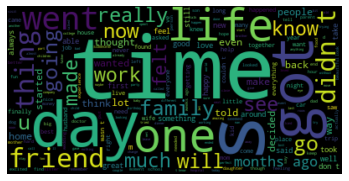

In [130]:
# imagined
wordcloud_im = WordCloud().generate(imagined)
plt.imshow(wordcloud_im, interpolation='bilinear')
plt.axis("off")
plt.show()

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


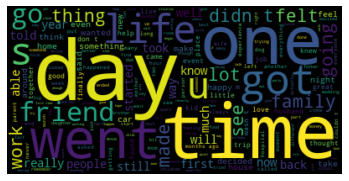

In [131]:
# recalled
wordcloud_rec = WordCloud().generate(recalled)
plt.imshow(wordcloud_rec, interpolation='bilinear')
plt.axis("off")
plt.show()

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


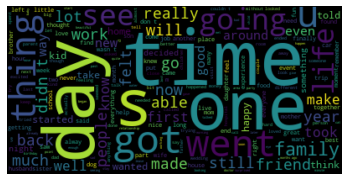

In [132]:
# retold
wordcloud_ret = WordCloud().generate(retold)
plt.imshow(wordcloud_ret, interpolation='bilinear')
plt.axis("off")
plt.show()

## Categories from topic modeling

In [133]:
for idx, topic in Model.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))

Topic: 0 
Words: ['time', 'got', 'went', 'day', 'one', 'back', 'would', 'go', 'get', 'family', 'us', 'see', 'could', 'really', 'took', 'much', 'around', 'home', 'also', 'like', 'trip', 'first', 'great', 'going', 'decided', 'made', 'fun', 'ago', 'months', 'little']
Topic: 1 
Words: ['time', 'like', 'would', 'really', 'get', 'one', 'day', 'know', 'went', 'work', 'us', 'could', 'even', 'felt', 'life', 'things', 'going', 'got', 'much', 'go', 'feel', 'back', 'told', 'first', 'family', 'still', 'think', 'ago', 'good', 'months']
Topic: 2 
Words: ['day', 'time', 'would', 'one', 'life', 'got', 'get', 'new', 'going', 'friends', 'months', 'ago', 'made', 'family', 'like', 'back', 'could', 'never', 'went', 'school', 'also', 'years', 'know', 'people', 'best', 'good', 'see', 'first', 'work', 'well']
/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass t

In [134]:
# create topic lists
topic0 = Model.show_topics(formatted=False, num_words= 1000)[0][1]
topic1 = Model.show_topics(formatted=False, num_words= 1000)[1][1]
topic2 = Model.show_topics(formatted=False, num_words= 1000)[2][1]

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:
# convert lists to dictionaries
dict0 = {}
for x1 in topic0:
    dict0[x1[0]] = x1[1]
dict1 = {}
for x1 in topic1:
    dict1[x1[0]] = x1[1]
dict2 = {}
for x1 in topic2:
    dict2[x1[0]] = x1[1]

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


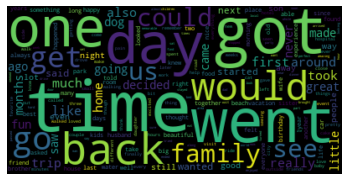

In [136]:
# wordcloud topic0
wordcloud_topic0 = WordCloud().fit_words(dict0)
plt.imshow(wordcloud_topic0, interpolation='bilinear')
plt.axis("off")
plt.show()

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


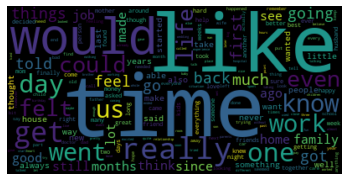

In [137]:
# wordcloud topic1
wordcloud_topic1 = WordCloud().fit_words(dict1)
plt.imshow(wordcloud_topic1, interpolation='bilinear')
plt.axis("off")
plt.show()

/Users/felicia/opt/anaconda3/envs/ds/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


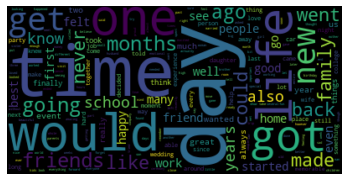

In [138]:
# wordcloud topic2
wordcloud_topic2 = WordCloud().fit_words(dict2)
plt.imshow(wordcloud_topic2, interpolation='bilinear')
plt.axis("off")
plt.show()